### Text analysis for user judgement 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import WordCloud
from nltk.corpus import stopwords

In [26]:
# import libraries
import pandas as pd
import nltk
import random
from faker import Faker
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
nltk.download('punkt')
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /Users/ayoub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ayoub/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [116]:
def clean_text_data(text_data):
    word_list = []
    for val in text_data:
        # print("-------->",val)
        text = str(val)
        text = text.lower()
        tokens = word_tokenize(text)
        # remove the word
        tokens = nltk.pos_tag(tokens)
        # print(tokens)
        for l in tokens:
            if l[0] == "i":
                pass
            elif l[1] == "NN" or l[1] == "NNS" or l[1] == "NNP" or l[1]== "VBR":
                word_list.append(l[0])
    return(word_list)

In [117]:
# judgment.to_csv('test.csv', index=False)
judgment = pd.read_csv('test.csv')
judgment = judgment[["judging", "rating"]]

In [118]:
## attractive
attractive_text = judgment.loc[judgment.rating >= 4]
# attractive_text[['judging']]

## attractive
unattractive_text = judgment.loc[judgment.rating < 4]
# attractive_text[['judging']]


In [119]:
cleaned_attractive_text = clean_text_data(attractive_text.judging)
cleaned_unattractive_text = clean_text_data(unattractive_text.judging)

In [48]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(cleaned_attractive_text)
# Create Corpus
texts = cleaned_attractive_text
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1)]


In [68]:
from pprint import pprint
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=2)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.084*"looks" + 0.025*"food" + 0.024*"image" + 0.019*"salad" + 0.018*"dish" '
  '+ 0.016*"bit" + 0.015*"photo" + 0.015*"presentation" + 0.015*"quality" + '
  '0.014*"ingredients"'),
 (1,
  '0.026*"ingredients" + 0.026*"looks" + 0.022*"colours" + 0.017*"photo" + '
  '0.017*"food" + 0.017*"pasta" + 0.017*"picture" + 0.015*"presentation" + '
  '0.015*"dish" + 0.015*"image"')]


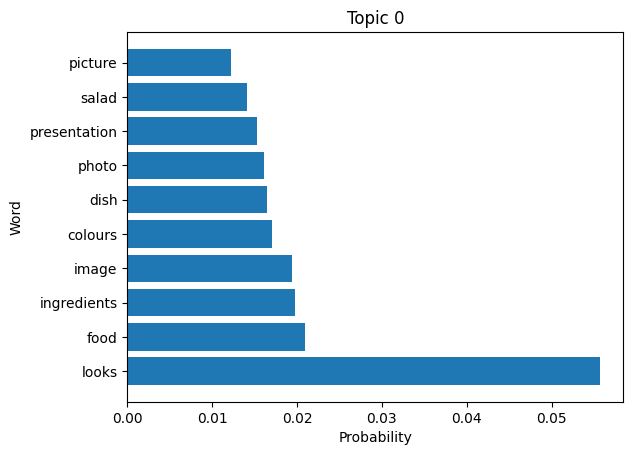

In [67]:
import matplotlib.pyplot as plt

topics = lda_model.show_topics(num_topics=1, num_words=10, formatted=False)
for topic_id, topic in topics:
    words = [word for word, prob in topic]
    probs = [prob for word, prob in topic]
    plt.barh(words, probs)
    plt.title(f"Topic {topic_id}")
    plt.xlabel("Probability")
    plt.ylabel("Word")
    plt.show()

In [120]:
cleaned_attractive_text_df =  pd.DataFrame(cleaned_attractive_text, columns=['Term'])
cleaned_unattractive_text_df=  pd.DataFrame(cleaned_unattractive_text, columns=['Term'])

In [121]:
cleaned_attractive_text_df.value_counts().reset_index().to_csv('attractive_judgment.csv', index=False)

In [122]:
cleaned_unattractive_text_df.value_counts().reset_index().to_csv('unattractive_judgment.csv', index=False)

In [232]:
def create_cloud_graph(string, col_mix):
    # stopwords= set(STOPWORDS)|{'skirt', 'blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse', 'looked', 'look', 'looks'}
    s = " "
    ww = s.join(string)
    

    
    
    # _, _, text_width, text_height = ImageDraw.Draw(image).textbbox((0, 0), your_text, font=your_font)
    
    
    wordcloud = WordCloud(background_color='white', stopwords = stopwords.words('english'), colormap=col_mix, width=1600, height=800,collocations=False).generate(ww)
    
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

- Word clouds for attractive text

/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

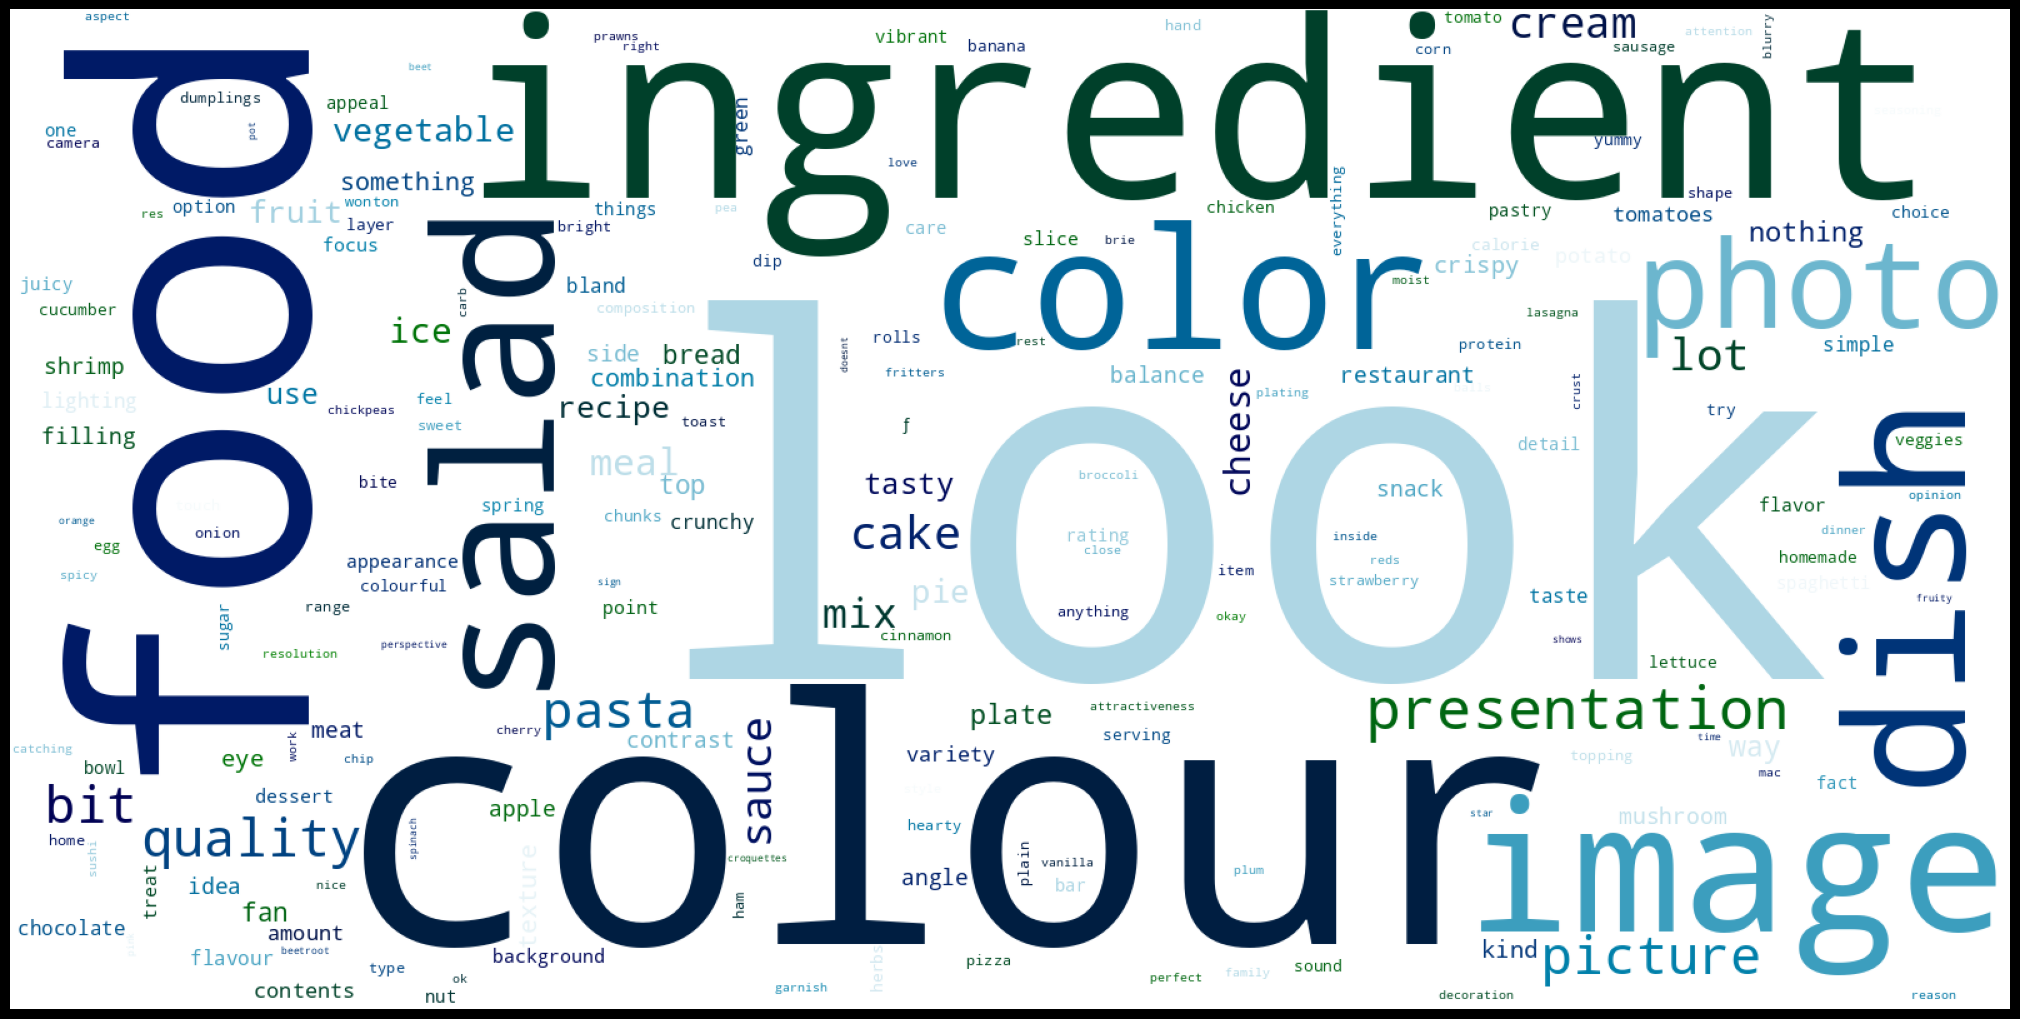

In [220]:
create_cloud_graph(cleaned_attractive_text)

- Word clouds for unattractive text

/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

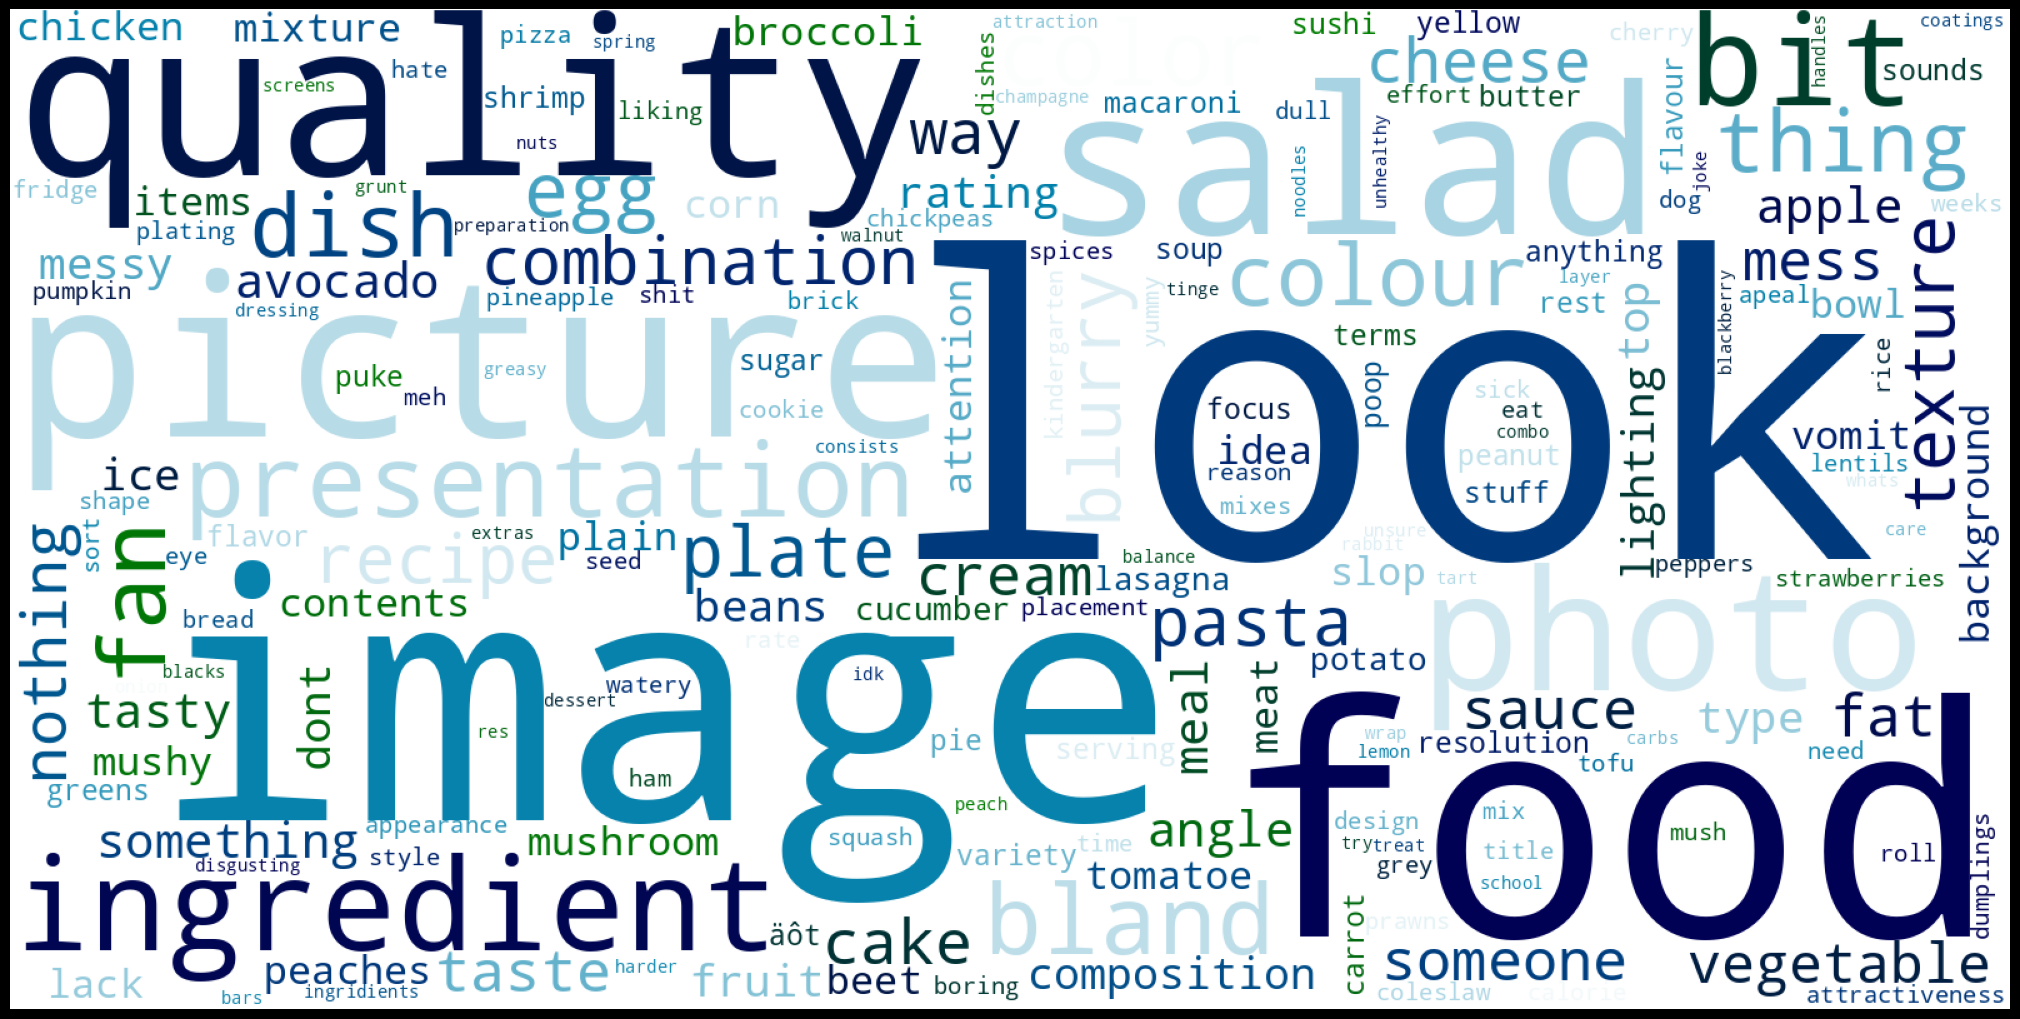

In [221]:
create_cloud_graph(cleaned_unattractive_text)

In [222]:
#unique words
unique_attr = cleaned_attractive_text_df[ ~cleaned_attractive_text_df.Term.isin(cleaned_unattractive_text_df.Term) ]


In [223]:
#unique words

unique_unat = cleaned_unattractive_text_df[ ~cleaned_unattractive_text_df.Term.isin(cleaned_attractive_text_df.Term) ]

In [313]:
to_remove = ['yes', 'avo','set', 'sit', 'abnd','wouldnt','hers','tehy','clafoutis','i‚äôm',
             'europe','overall','base', 'ad', 'ca≈çe', 'tho', 'tad', 'ok', 'ƒ±', "id", "puff", "'poppin", "ithink", "thugh","id","id", "one", "lots","okay", "reds","lone", "herbs","ones", "humm", "take", "array", "irks", "guac", "end"]

In [285]:
unique_attr.Term.replace('lookin', 'looking', inplace=True)

In [286]:
#unique words
unique_attr = unique_attr[ ~unique_attr.Term.isin(to_remove)]

In [312]:
unique_attr.to_csv('new_unique_attract.csv', index=False)

/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

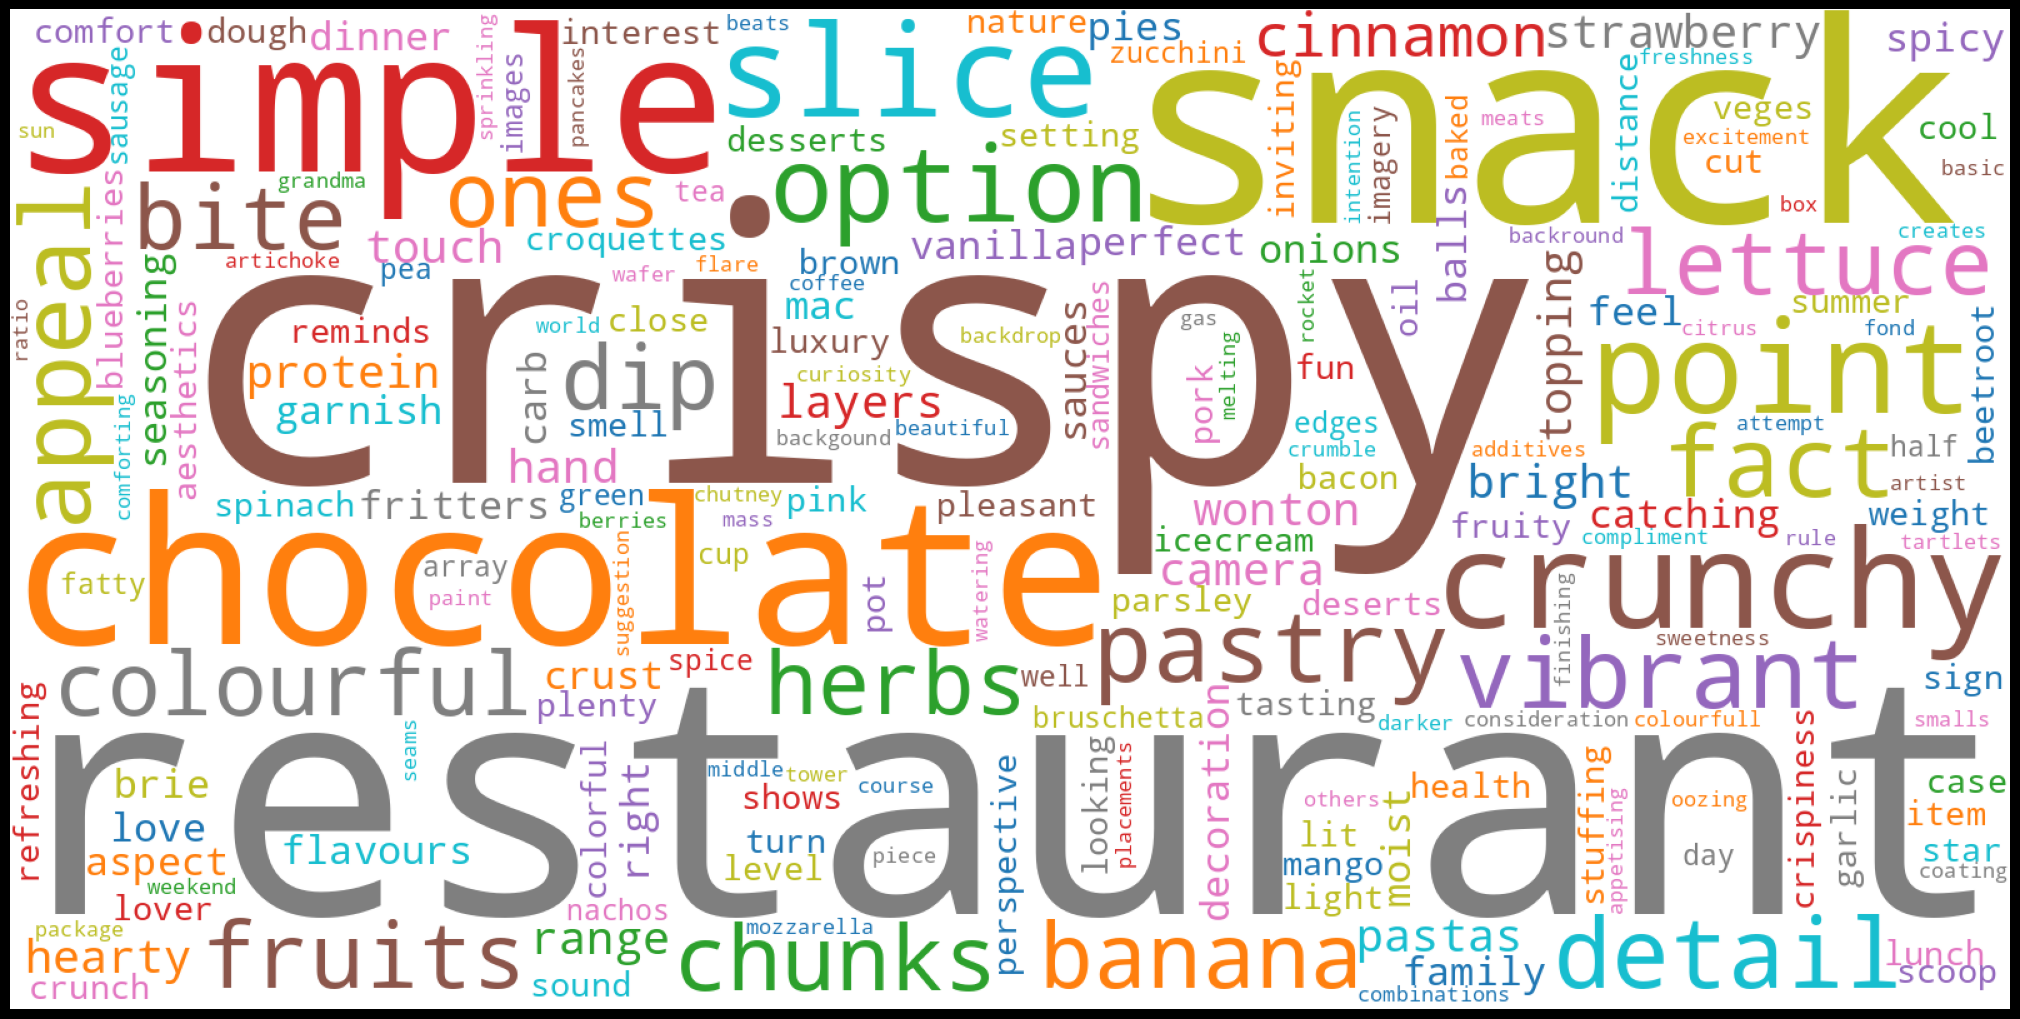

In [335]:
create_cloud_graph(unique_attr.Term, "tab10")

In [227]:
unique_attr.Term.value_counts().reset_index().to_csv('unique_attractive.csv', index=False)
unique_unat.Term.value_counts().reset_index().to_csv('unique_unattractive.csv', index=False)

In [324]:
un_to_remove = ["thing", "someone","vomit", "dog","kindergarten", "eh", "t", "can‚äôt", "look‚äôs",
                "tha", "ƒ±t", "goo", "hence", "äôt", "don‚Äö√§√¥t", "don‚Äö√§√¥t", "don‚äôt", "whats","poop", "terms","lack","liking", "theres","shit", "herbs", "need","thank","gherkin", "issue", "overs", "edmame","see"]

In [325]:
#unique words
unique_unat = unique_unat[ ~unique_unat.Term.isin(un_to_remove)]

In [326]:
unique_unat.to_csv('new_unatraa_.csv', index=False)

/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/anaconda3/envs/dev/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size 

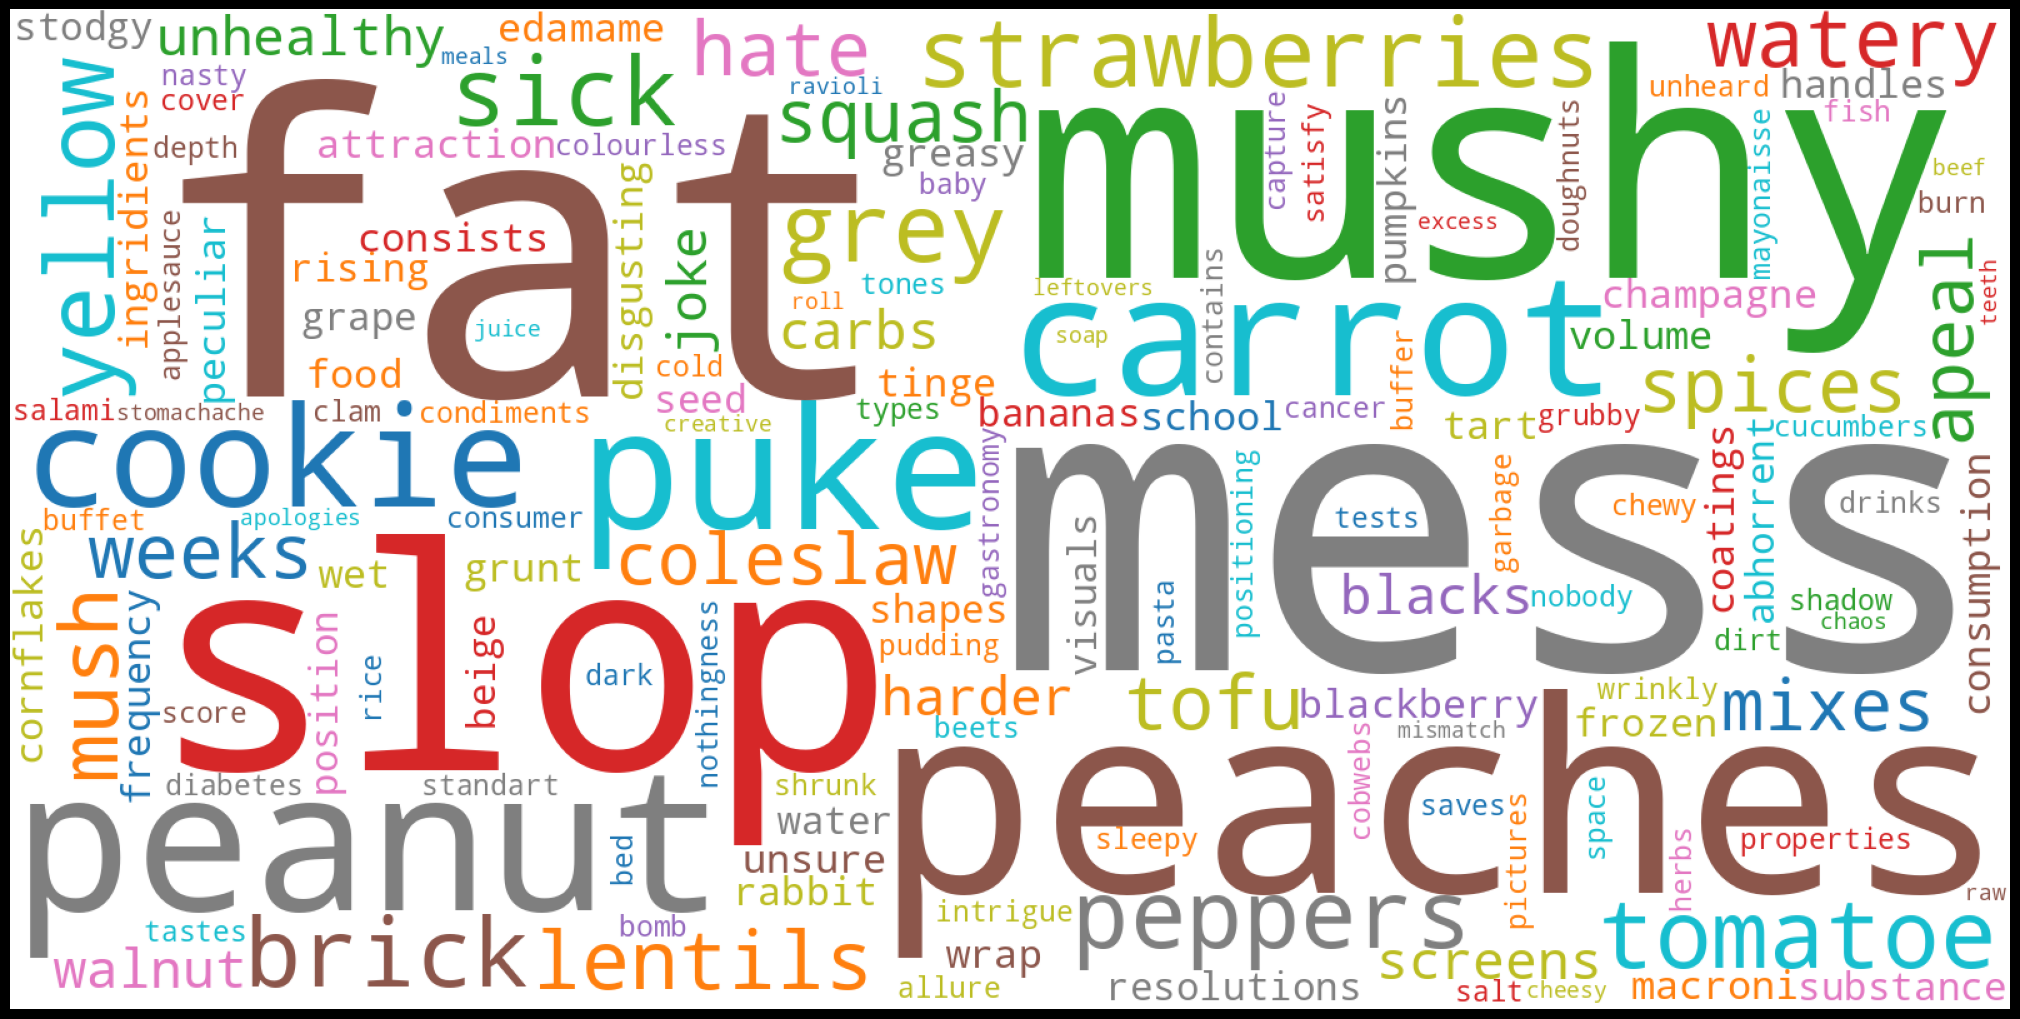

In [334]:
create_cloud_graph(unique_unat.Term, "tab10")

In [310]:
unique_unat.to_csv('new_unatractive.csv', index=False)